In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_transaction = pd.read_csv('kn_Transaction.csv', sep=";")
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [3]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [4]:
df_store = pd.read_csv('kn_Store.csv', sep=";")
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [5]:
df_customer = pd.read_csv('kn_Customer.csv', sep=";")
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [6]:
df_product = pd.read_csv('kn_Product.csv', sep=";")
df_product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


# Data Preprocessing

In [7]:
df_transaction.duplicated().sum()

0

In [8]:
df_store.duplicated().sum()

0

In [9]:
df_customer.duplicated().sum()

0

In [10]:
df_product.duplicated().sum()

0

In [11]:
df_transaction.duplicated(subset=['TransactionID','CustomerID']).sum()

0

In [12]:
df_transaction[df_transaction.duplicated(subset=['TransactionID'], keep=False)].sort_values(by='TransactionID', ascending=False)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
2953,TR99533,314,31/07/2022,P6,18000,2,36000,3
2465,TR99533,178,25/06/2022,P1,8800,9,79200,10
495,TR96549,252,04/02/2022,P5,4200,4,16800,3
1878,TR96549,96,14/05/2022,P8,16000,2,32000,7
542,TR96509,298,08/02/2022,P9,10000,7,70000,12
...,...,...,...,...,...,...,...,...
3575,TR1280,60,17/09/2022,P10,15000,5,75000,2
574,TR12602,338,11/02/2022,P2,3200,7,22400,2
2079,TR12602,154,30/05/2022,P7,9400,6,56400,13
3022,TR11542,286,07/08/2022,P8,16000,1,16000,8


In [13]:
df_merge = pd.merge(df_transaction, df_customer, on=['CustomerID'])
df_merge = pd.merge(df_merge, df_product.drop(columns=['Price']), on=['ProductID'])
df_merge = pd.merge(df_merge, df_store, on=['StoreID'])
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR89318,183,17/07/2022,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2,TR9106,123,26/09/2022,P3,7500,4,30000,12,34,0,Married,"4,36",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
3,TR4331,335,08/01/2022,P3,7500,3,22500,12,29,1,Single,"4,74",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
4,TR6445,181,10/01/2022,P3,7500,4,30000,12,33,1,Married,"9,94",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"


In [14]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TransactionID   5020 non-null   object
 1   CustomerID      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   ProductID       5020 non-null   object
 4   Price           5020 non-null   int64 
 5   Qty             5020 non-null   int64 
 6   TotalAmount     5020 non-null   int64 
 7   StoreID         5020 non-null   int64 
 8   Age             5020 non-null   int64 
 9   Gender          5020 non-null   int64 
 10  Marital Status  4976 non-null   object
 11  Income          5020 non-null   object
 12  Product Name    5020 non-null   object
 13  StoreName       5020 non-null   object
 14  GroupStore      5020 non-null   object
 15  Type            5020 non-null   object
 16  Latitude        5020 non-null   object
 17  Longitude       5020 non-null   object
dtypes: int64

In [15]:
df_merge['Date'] = pd.to_datetime(df_merge['Date'])
df_merge['Income'] = df_merge['Income'].replace('[,]','.',regex=True).astype('float')
df_merge['Latitude'] = df_merge['Latitude'].replace('[,]','.',regex=True).astype('float')
df_merge['Longitude'] = df_merge['Longitude'].replace('[,]','.',regex=True).astype('float')

In [16]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price           5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Age             5020 non-null   int64         
 9   Gender          5020 non-null   int64         
 10  Marital Status  4976 non-null   object        
 11  Income          5020 non-null   float64       
 12  Product Name    5020 non-null   object        
 13  StoreName       5020 non-null   object        
 14  GroupStore      5020 non-null   object        
 15  Type

In [17]:
cluster_df = df_merge.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

cluster_df.rename(columns={
    'TransactionID': 'TransactionCount',
    'Qty': 'TotalQty',
    'TotalAmount': 'TotalPurchaseAmount'
}, inplace=True)

cluster_df.head()

,CustomerID,TransactionCount,TotalQty,TotalPurchaseAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [18]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   CustomerID           447 non-null    int64
 1   TransactionCount     447 non-null    int64
 2   TotalQty             447 non-null    int64
 3   TotalPurchaseAmount  447 non-null    int64
dtypes: int64(4)
memory usage: 14.1 KB


In [19]:
cluster_df_prep = cluster_df.drop(columns=['CustomerID']).copy()

In [20]:
nums = ['TransactionCount','TotalQty','TotalPurchaseAmount']

In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

for n in nums:
  scaler = ss.fit(cluster_df_prep[[n]])
  cluster_df_prep[n] = scaler.transform(cluster_df_prep[[n]])

## K-MEANS

WCSS difference between 2 and 3 clusters: 226.28226006238117
WCSS difference between 3 and 4 clusters: 78.41858015805923
WCSS difference between 4 and 5 clusters: 46.38600063437622
WCSS difference between 5 and 6 clusters: 22.292979841027375
WCSS difference between 6 and 7 clusters: 16.02603480035785
WCSS difference between 7 and 8 clusters: 12.801466381463882
WCSS difference between 8 and 9 clusters: 11.047181273115541
WCSS difference between 9 and 10 clusters: 8.034425827781206


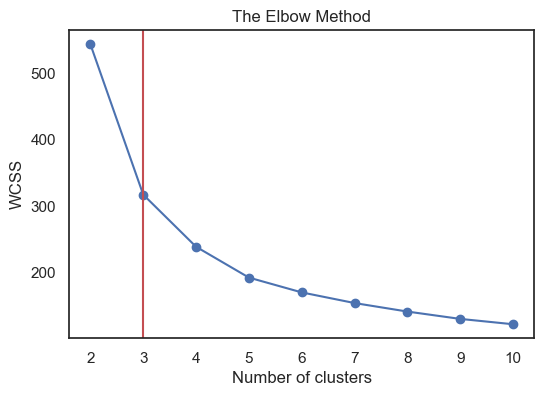

In [22]:
import sklearn
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# membuat fungsi Elbow Method
sns.set_theme('notebook', style='white')
def elbowMethod(data, k_min=2, k_max=10):
    wcss = [] # Within Cluster Sum of Squares
    diff_wcss = [] # Difference in WCSS
    k_range = range(k_min, k_max + 1)

    for i in k_range:
        kmeans_test = KMeans(n_clusters = i, random_state = 0, init = 'k-means++')
        kmeans_test.fit(data)
        wcss.append(kmeans_test.inertia_)
        
        # Calculate and print WCSS difference for each cluster, if it's not the first one
        if i != k_min:
            diff = wcss[-2] - wcss[-1]  # Calculate difference between the last two WCSS
            diff_wcss.append(diff)
            print(f"WCSS difference between {i-1} and {i} clusters: {diff}")

    fig, ax = plt.subplots(figsize=(6,4))
    ax.plot(k_range, wcss, marker='o')

    plt.axvline(x = 3, color = 'r')
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

elbowMethod(cluster_df_prep)

In [23]:
from sklearn.metrics import silhouette_score

for n_clusters in range(2,11):
    clusterer = KMeans(n_clusters=n_clusters,init='k-means++', random_state=0).fit(cluster_df_prep)
    preds = clusterer.predict(cluster_df_prep)

    score = silhouette_score(cluster_df_prep, preds, metric='mahalanobis')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.2287906972314402
For n_clusters = 3. The average silhouette_score is : 0.13179819377853097
For n_clusters = 4. The average silhouette_score is : 0.09358487367428363
For n_clusters = 5. The average silhouette_score is : 0.0625633779504516
For n_clusters = 6. The average silhouette_score is : 0.052432724391702504
For n_clusters = 7. The average silhouette_score is : 0.02449555309223963
For n_clusters = 8. The average silhouette_score is : 0.040261017841836576
For n_clusters = 9. The average silhouette_score is : 0.022562151581640783
For n_clusters = 10. The average silhouette_score is : 0.03899502435609216


In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

for n_clusters in range(2, 11):
    # Applying KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0)
    labels = kmeans.fit_predict(cluster_df_prep)
    
    # Computing the CH index
    ch_score = calinski_harabasz_score(cluster_df_prep, labels)
    print("For n_clusters = {}. The CH index is : {}".format(n_clusters, ch_score))

For n_clusters = 2. The CH index is : 653.4641260524365
For n_clusters = 3. The CH index is : 717.2068390548966
For n_clusters = 4. The CH index is : 682.425138054242
For n_clusters = 5. The CH index is : 660.6022109783049
For n_clusters = 6. The CH index is : 608.0577815645739
For n_clusters = 7. The CH index is : 565.8685105950855
For n_clusters = 8. The CH index is : 533.5413278757936
For n_clusters = 9. The CH index is : 510.0196135430197
For n_clusters = 10. The CH index is : 485.3105275582169


In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

for n_clusters in range(2, 11):
    # Applying KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0)
    labels = kmeans.fit_predict(cluster_df_prep)
    
    # Computing the Davies-Bouldin Index
    dbi_score = davies_bouldin_score(cluster_df_prep, labels)
    print("For n_clusters = {}. The Davies-Bouldin Index is : {}".format(n_clusters, dbi_score))

For n_clusters = 2. The Davies-Bouldin Index is : 0.7189977514002018
For n_clusters = 3. The Davies-Bouldin Index is : 0.7494704905131385
For n_clusters = 4. The Davies-Bouldin Index is : 0.830040542983167
For n_clusters = 5. The Davies-Bouldin Index is : 0.9201923720532876
For n_clusters = 6. The Davies-Bouldin Index is : 1.0511905276932627
For n_clusters = 7. The Davies-Bouldin Index is : 1.0849239386234968
For n_clusters = 8. The Davies-Bouldin Index is : 1.0976494295097758
For n_clusters = 9. The Davies-Bouldin Index is : 1.121293631042712
For n_clusters = 10. The Davies-Bouldin Index is : 1.05338056576494


In [26]:
from sklearn.cluster import KMeans

def pseudo_f_statistic(data, labels):
    n_clusters = len(np.unique(labels))
    n_samples, n_features = data.shape
    overall_mean = np.mean(data, axis=0)
    
    # Between Cluster
    ssb = sum([np.sum(labels == i) * np.linalg.norm(np.mean(data[np.where(labels == i)], axis=0) - overall_mean) ** 2
               for i in range(n_clusters)])
    
    # Within Cluster
    ssw = sum([np.sum(np.linalg.norm(data[np.where(labels == i)] - np.mean(data[np.where(labels == i)], axis=0), axis=1) ** 2)
               for i in range(n_clusters)])
    
    return (ssb / (n_clusters - 1)) / (ssw / (n_samples - n_clusters))

# Define range of cluster numbers
for n_clusters in range(2, 11):
    # Fit a K-Means model
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(cluster_df_prep)
    
    # Calculate the Pseudo F-statistic
    score = pseudo_f_statistic(cluster_df_prep.values, labels)
    
    print(f"For n_clusters = {n_clusters}. The Pseudo F-statistic is : {score}")

For n_clusters = 2. The Pseudo F-statistic is : 653.4641260524367
For n_clusters = 3. The Pseudo F-statistic is : 717.2068390548967
For n_clusters = 4. The Pseudo F-statistic is : 682.4251380542422
For n_clusters = 5. The Pseudo F-statistic is : 660.6022109783048
For n_clusters = 6. The Pseudo F-statistic is : 608.0577815645738
For n_clusters = 7. The Pseudo F-statistic is : 565.8685105950855
For n_clusters = 8. The Pseudo F-statistic is : 533.5413278757937
For n_clusters = 9. The Pseudo F-statistic is : 510.0196135430197
For n_clusters = 10. The Pseudo F-statistic is : 485.3105275582171


In [27]:
import numpy as np
from sklearn.cluster import KMeans

def icd_rate(data, labels):
    n_clusters = len(np.unique(labels))
    overall_mean = np.mean(data, axis=0)
    ssb = sum([np.sum(labels == i) * np.linalg.norm(np.mean(data[labels == i], axis=0) - overall_mean) ** 2
               for i in range(n_clusters)])
    sst = np.sum(np.linalg.norm(data - overall_mean, axis=1) ** 2)
    icd = 1 - (ssb / sst)
    
    return icd

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0)
    labels = kmeans.fit_predict(cluster_df_prep)
    rate = icd_rate(cluster_df_prep.values, labels)
    print(f"For n_clusters = {n_clusters}. The ICD Rate is : {rate}")

For n_clusters = 2. The ICD Rate is : 0.40511109051799576
For n_clusters = 3. The ICD Rate is : 0.23636965870413995
For n_clusters = 4. The ICD Rate is : 0.1778919702939541
For n_clusters = 5. The ICD Rate is : 0.14330136579404662
For n_clusters = 6. The ICD Rate is : 0.12667721975301194
For n_clusters = 7. The ICD Rate is : 0.11472641080419921
For n_clusters = 8. The ICD Rate is : 0.10518020172033338
For n_clusters = 9. The ICD Rate is : 0.09694218436528812
For n_clusters = 10. The ICD Rate is : 0.09095081536619687


In [28]:
km = KMeans(n_clusters=3, random_state=0)
km.fit(cluster_df_prep)
y_predicted = km.predict(cluster_df_prep)
cluster_df_prep['hasil_klaster'] = y_predicted

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(cluster_df_prep)
pcs = pca.transform(cluster_df_prep)

In [30]:
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['cluster']  = y_predicted
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PC 1     447 non-null    float64
 1   PC 2     447 non-null    float64
 2   cluster  447 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 8.9 KB


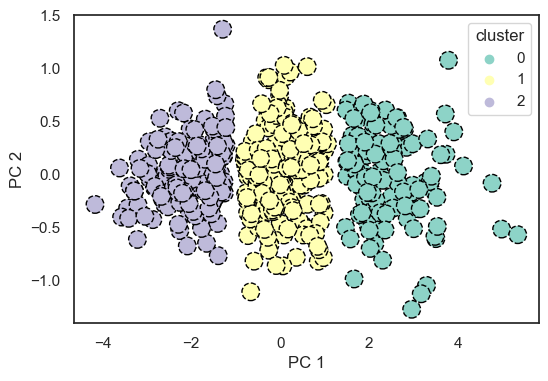

In [31]:
fig, ax = plt.subplots(figsize=(6,4))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    s=160,
    ax=ax,
    palette='Set3' 
)

plt.show()

In [32]:
df_clust_result = cluster_df.copy()
df_clust_result['klaster'] = y_predicted
df_clust_result.head()

,CustomerID,TransactionCount,TotalQty,TotalPurchaseAmount,klaster
0,1,17,60,623300,0
1,2,13,57,392300,0
2,3,15,56,446200,0
3,4,10,46,302500,1
4,5,7,27,268600,2


In [33]:
hasilcl = df_clust_result[['TransactionCount','TotalQty','TotalPurchaseAmount','klaster']]

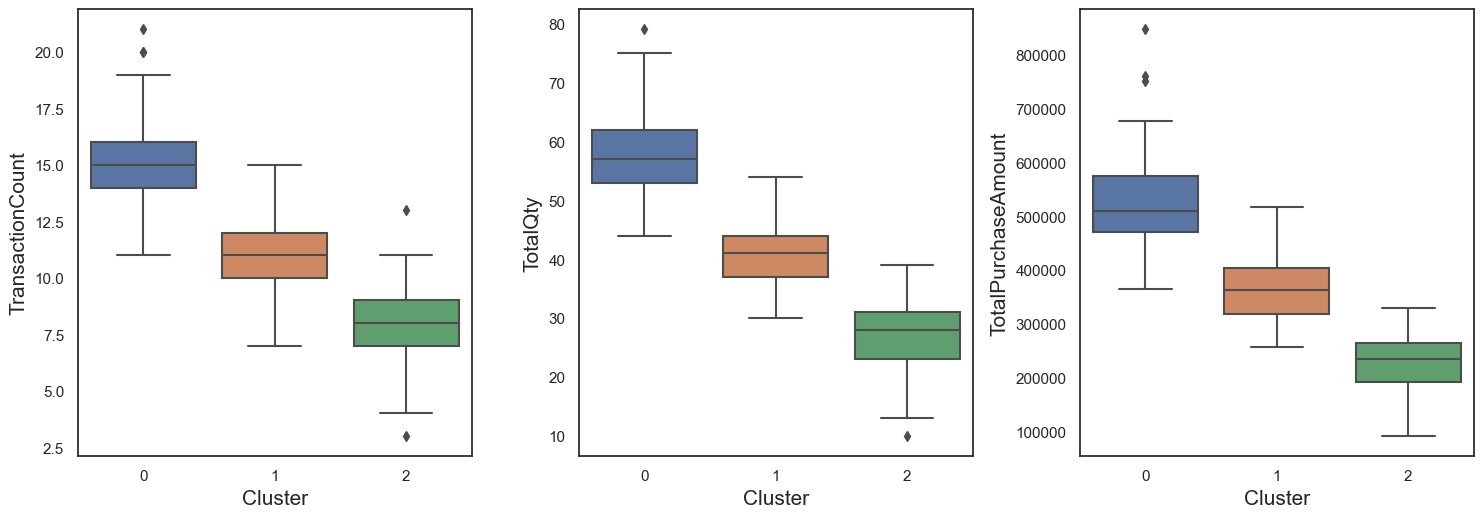

In [34]:
# Grafik Visualisasi dalam bentuk Boxplot
plt.figure(figsize=(15, 10))
for i, var in enumerate(['TransactionCount', 'TotalQty', 'TotalPurchaseAmount']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='klaster', y=var, data=hasilcl)
    plt.ylabel(var, fontsize=15)
    plt.xlabel('Cluster', fontsize=15)
plt.tight_layout()
plt.show()

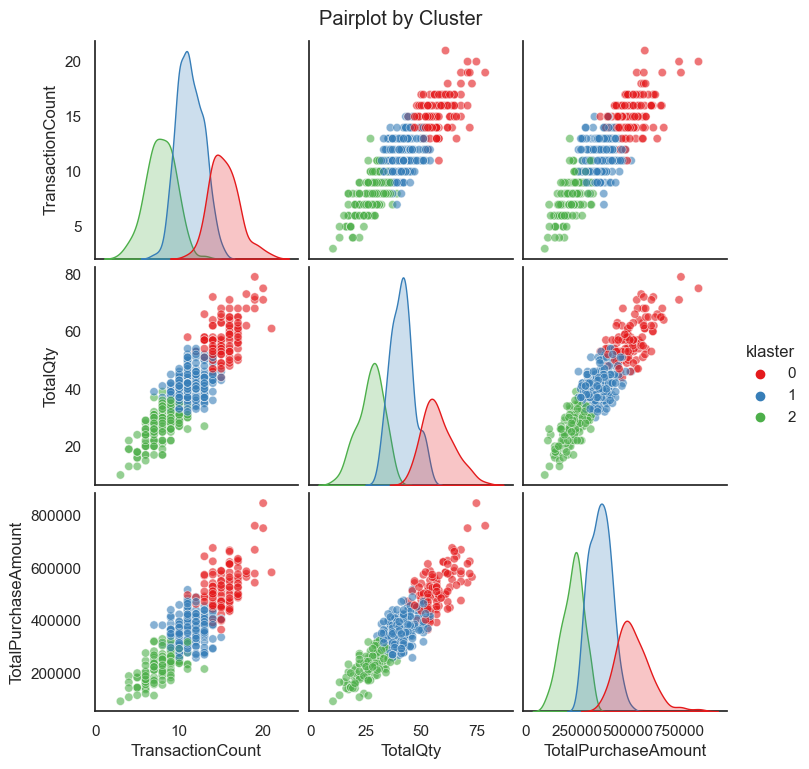

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(hasilcl, hue='klaster', diag_kind='kde', plot_kws={'alpha': 0.6}, palette='Set1')
plt.suptitle('Pairplot by Cluster', y=1.02)
plt.show()

In [36]:
median_by_cluster = hasilcl.groupby('klaster')[['TransactionCount', 'TotalQty', 'TotalPurchaseAmount']].median()
median_by_cluster

,TransactionCount,TotalQty,TotalPurchaseAmount
klaster,,,
0,15.0,57.0,510550.0
1,11.0,41.0,362400.0
2,8.0,28.0,235300.0


In [37]:
print(df_merge['Product Name'].unique())

['Crackers' 'Oat' 'Thai Tea' 'Choco Bar' 'Coffee Candy' 'Yoghurt'
 'Ginger Candy ' 'Cheese Stick' 'Cashew' 'Potato Chip']


## FUZZY C-MEANS

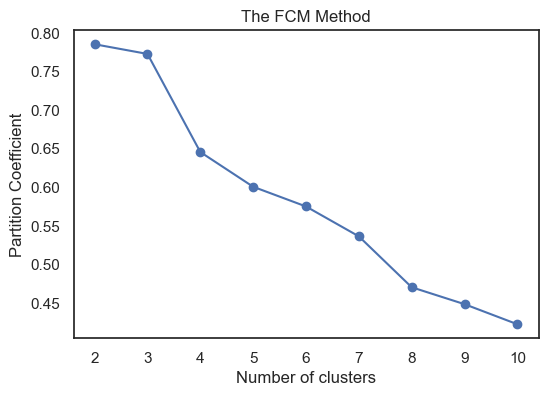

In [106]:
import numpy as np
import skfuzzy as fuzz
import seaborn as sns
import matplotlib.pyplot as plt

def elbowMethodFCM(data, k_min=2, k_max=10, error=0.005, maxiter=1000, random_state=None):
    scores = []
    k_range = range(k_min, k_max + 1)

    np.random.seed(random_state)  # Setting random seed

    for i in k_range:
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data.T, i, 2, error=error, maxiter=maxiter, init=None)
        scores.append(fpc)  # Using the partition coefficient here. Higher values are better (opposite to WCSS)

    fig, ax = plt.subplots(figsize=(6,4))
    ax.plot(k_range, scores, marker='o')
    plt.title('The FCM Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Partition Coefficient')
    plt.show()

elbowMethodFCM(cluster_df_prep.values, random_state=None)

In [107]:
import numpy as np
import skfuzzy as fuzz
from sklearn.metrics import silhouette_score

def fuzzy_clustering_with_silhouette(data, k_min=2, k_max=10, error=0.005, maxiter=1000, random_state=None):
    np.random.seed(random_state)  # Setting the seed for reproducibility
    
    for n_clusters in range(k_min, k_max + 1):
        # Applying FCM clustering
        cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(data.T, n_clusters, 2, error=error, maxiter=maxiter, init=None)
        
        # Assigning each sample to the cluster with the highest membership
        labels = np.argmax(u, axis=0)
        
        # Computing the silhouette score
        score = silhouette_score(data, labels, metric='mahalanobis')
        print("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

# Usage
fuzzy_clustering_with_silhouette(cluster_df_prep, random_state=None)

For n_clusters = 2. The average silhouette_score is : 0.27183284303868194
For n_clusters = 3. The average silhouette_score is : 0.36933646170112294
For n_clusters = 4. The average silhouette_score is : 0.22507173689285356
For n_clusters = 5. The average silhouette_score is : 0.13042728163557674
For n_clusters = 6. The average silhouette_score is : 0.0995098351408962
For n_clusters = 7. The average silhouette_score is : 0.17510053884715532
For n_clusters = 8. The average silhouette_score is : 0.09097330715470671
For n_clusters = 9. The average silhouette_score is : 0.07050625249723605
For n_clusters = 10. The average silhouette_score is : 0.07962268872629856


In [108]:
import skfuzzy as fuzz
from sklearn.metrics import calinski_harabasz_score

for n_clusters in range(2,11):
    # Applying FCM clustering
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(cluster_df_prep.T, n_clusters, 2, error=0.005, maxiter=1000)
    
    # Assigning each sample to the cluster with the highest membership
    labels = np.argmax(u, axis=0)
    
    # Computing the CH index
    ch_score = calinski_harabasz_score(cluster_df_prep, labels)
    print ("For n_clusters = {}. The CH index is : {}".format(n_clusters, ch_score))

For n_clusters = 2. The CH index is : 559.0986855907321
For n_clusters = 3. The CH index is : 946.2006607010239
For n_clusters = 4. The CH index is : 755.6525765541596
For n_clusters = 5. The CH index is : 724.296689294685
For n_clusters = 6. The CH index is : 765.9750385844258
For n_clusters = 7. The CH index is : 541.9423888232566
For n_clusters = 8. The CH index is : 630.2106719952345
For n_clusters = 9. The CH index is : 600.1980609139496
For n_clusters = 10. The CH index is : 556.7528595288919


In [109]:
import skfuzzy as fuzz
from sklearn.metrics import davies_bouldin_score

for n_clusters in range(2,11):
    # Applying FCM clustering
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(cluster_df_prep.T, n_clusters, 2, error=0.005, maxiter=1000)
    
    # Assigning each sample to the cluster with the highest membership
    labels = np.argmax(u, axis=0)
    
    # Computing the Davies-Bouldin Index
    dbi_score = davies_bouldin_score(cluster_df_prep, labels)
    print ("For n_clusters = {}. The Davies-Bouldin Index is : {}".format(n_clusters, dbi_score))

For n_clusters = 2. The Davies-Bouldin Index is : 0.6495916755362195
For n_clusters = 3. The Davies-Bouldin Index is : 0.6129940633194854
For n_clusters = 4. The Davies-Bouldin Index is : 0.7674600147255619
For n_clusters = 5. The Davies-Bouldin Index is : 0.9476132341765936
For n_clusters = 6. The Davies-Bouldin Index is : 0.9942299144690034
For n_clusters = 7. The Davies-Bouldin Index is : 1.154897769188117
For n_clusters = 8. The Davies-Bouldin Index is : 1.0953050685794188
For n_clusters = 9. The Davies-Bouldin Index is : 1.1272343014941684
For n_clusters = 10. The Davies-Bouldin Index is : 1.2160024909388554


In [110]:
from sklearn.metrics import pairwise_distances
import numpy as np

def pseudo_f_statistic(data, labels):
    n_clusters = len(np.unique(labels))
    n_samples, n_features = data.shape
    overall_mean = np.mean(data, axis=0)
    between_ss = sum([np.sum(labels == i) * np.linalg.norm(np.mean(data[labels == i], axis=0) - overall_mean) ** 2
                      for i in range(n_clusters)])
    within_ss = sum([np.sum(np.linalg.norm(data[labels == i] - np.mean(data[labels == i], axis=0), axis=1) ** 2)
                     for i in range(n_clusters)])
    pseudo_f = (between_ss / (n_clusters - 1)) / (within_ss / (n_samples - n_clusters))

    return pseudo_f

for n_clusters in range(2, 11):
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(cluster_df_prep.T, n_clusters, 2, error=0.005, maxiter=1000)
    labels = np.argmax(u, axis=0)
    score = pseudo_f_statistic(cluster_df_prep.values, labels)
    print(f"For n_clusters = {n_clusters}. The Pseudo F-statistic is : {score}")

For n_clusters = 2. The Pseudo F-statistic is : 559.098685590732
For n_clusters = 3. The Pseudo F-statistic is : 946.2006607010237
For n_clusters = 4. The Pseudo F-statistic is : 755.6525765541594
For n_clusters = 5. The Pseudo F-statistic is : 709.9224655429034
For n_clusters = 6. The Pseudo F-statistic is : 765.9750385844259
For n_clusters = 7. The Pseudo F-statistic is : 688.2849888656625
For n_clusters = 8. The Pseudo F-statistic is : 631.4554565412908
For n_clusters = 9. The Pseudo F-statistic is : 600.5444799278173
For n_clusters = 10. The Pseudo F-statistic is : 577.6015050004887


In [111]:
import numpy as np
import skfuzzy as fuzz

def icd_rate(data, labels):
    n_clusters = len(np.unique(labels))
    overall_mean = np.mean(data, axis=0)
    ssb = sum([np.sum(labels == i) * np.linalg.norm(np.mean(data[labels == i], axis=0) - overall_mean) ** 2
               for i in range(n_clusters)])
    sst = np.sum(np.linalg.norm(data - overall_mean, axis=1) ** 2)
    icd = 1 - (ssb / sst)
    
    return icd

for n_clusters in range(2, 11):
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(cluster_df_prep.T, n_clusters, 2, error=0.005, maxiter=1000)
    labels = np.argmax(u, axis=0)
    rate = icd_rate(cluster_df_prep.values, labels)
    print(f"For n_clusters = {n_clusters}. The ICD Rate is : {rate}")

For n_clusters = 2. The ICD Rate is : 0.44318353005132893
For n_clusters = 3. The ICD Rate is : 0.19003584526889472
For n_clusters = 4. The ICD Rate is : 0.16344877963539295
For n_clusters = 5. The ICD Rate is : 0.13236755897218633
For n_clusters = 6. The ICD Rate is : 0.10325752453053272
For n_clusters = 7. The ICD Rate is : 0.09749067674655154
For n_clusters = 8. The ICD Rate is : 0.09050660539286859
For n_clusters = 9. The ICD Rate is : 0.08359441498857023
For n_clusters = 10. The ICD Rate is : 0.08005420934429042


In [112]:
import skfuzzy as fuzz

# Perform FCM clustering
n_clusters = 3
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(cluster_df_prep.T, n_clusters, 2, error=0.005, maxiter=1000)

# Assign a cluster to each sample: choosing the cluster with the highest membership
y_predicted = np.argmax(u, axis=0)

# Add cluster assignments to the DataFrame
cluster_df_prep['hasil_klaster'] = y_predicted

In [113]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(cluster_df_prep)
pcs = pca.transform(cluster_df_prep)

In [114]:
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['cluster']  = y_predicted
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PC 1     447 non-null    float64
 1   PC 2     447 non-null    float64
 2   cluster  447 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 10.6 KB


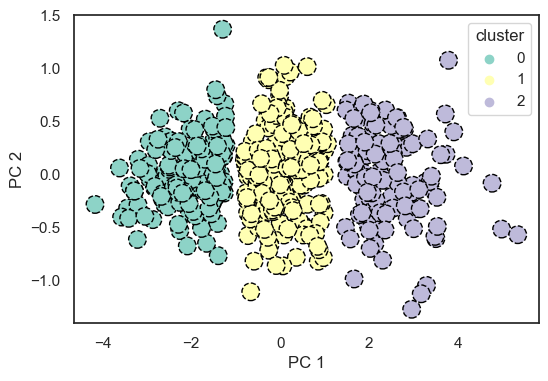

In [115]:
fig, ax = plt.subplots(figsize=(6,4))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    s=160,
    ax=ax,
    palette='Set3' 
)

plt.show()

In [116]:
df_clust_result = cluster_df.copy()
df_clust_result['klaster'] = y_predicted
df_clust_result.head()

,CustomerID,TransactionCount,TotalQty,TotalPurchaseAmount,klaster
0,1,17,60,623300,2
1,2,13,57,392300,2
2,3,15,56,446200,2
3,4,10,46,302500,1
4,5,7,27,268600,0


In [117]:
hasilcl = df_clust_result[['TransactionCount','TotalQty','TotalPurchaseAmount','klaster']]

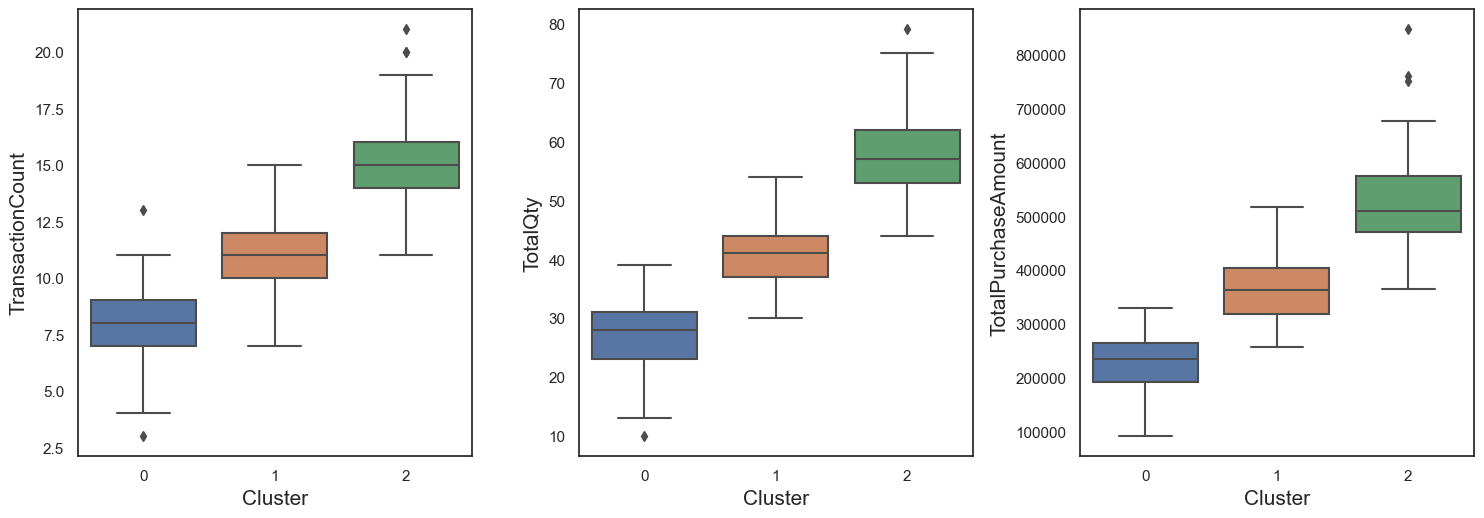

In [118]:
# Grafik Visualisasi dalam bentuk Boxplot
plt.figure(figsize=(15, 10))
for i, var in enumerate(['TransactionCount', 'TotalQty', 'TotalPurchaseAmount']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='klaster', y=var, data=hasilcl)
    plt.ylabel(var, fontsize=15)
    plt.xlabel('Cluster', fontsize=15)
plt.tight_layout()
plt.show()

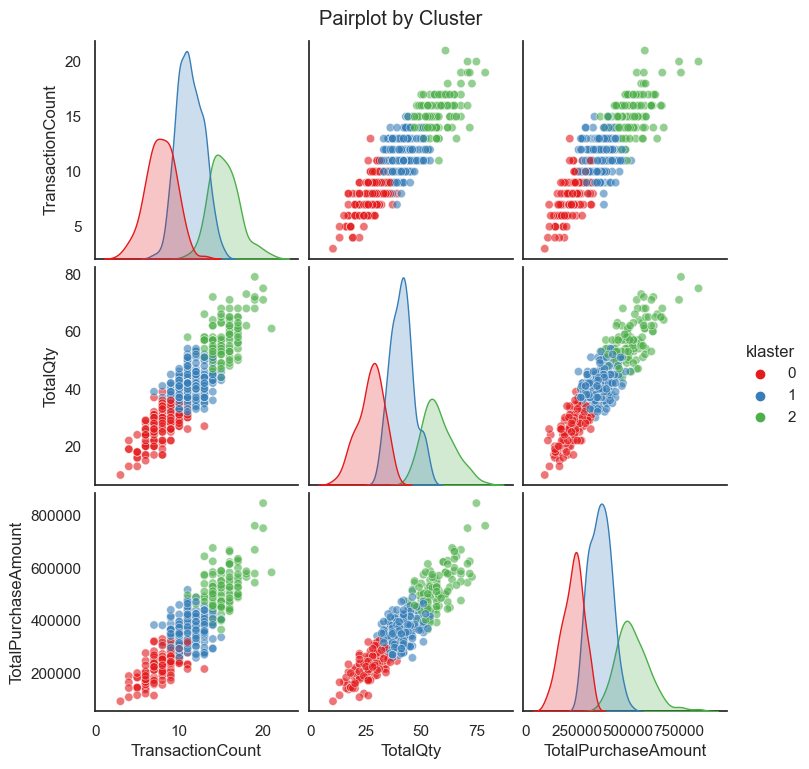

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(hasilcl, hue='klaster', diag_kind='kde', plot_kws={'alpha': 0.6}, palette='Set1')
plt.suptitle('Pairplot by Cluster', y=1.02)
plt.show()

In [120]:
median_by_cluster = hasilcl.groupby('klaster')[['TransactionCount', 'TotalQty', 'TotalPurchaseAmount']].median()
median_by_cluster

,TransactionCount,TotalQty,TotalPurchaseAmount
klaster,,,
0,8.0,28.0,235300.0
1,11.0,41.0,362400.0
2,15.0,57.0,510550.0


## Cluster characteristics

In [121]:
df_merge_cluster = pd.merge(df_transaction, df_clust_result, on=['CustomerID'])
df_merge_cluster = pd.merge(df_merge_cluster, df_product.drop(columns=['Price']), on=['ProductID'])
df_merge_cluster = pd.merge(df_merge_cluster, df_store, on=['StoreID'])
df_merge_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   TransactionID        5020 non-null   object
 1   CustomerID           5020 non-null   int64 
 2   Date                 5020 non-null   object
 3   ProductID            5020 non-null   object
 4   Price                5020 non-null   int64 
 5   Qty                  5020 non-null   int64 
 6   TotalAmount          5020 non-null   int64 
 7   StoreID              5020 non-null   int64 
 8   TransactionCount     5020 non-null   int64 
 9   TotalQty             5020 non-null   int64 
 10  TotalPurchaseAmount  5020 non-null   int64 
 11  klaster              5020 non-null   int64 
 12  Product Name         5020 non-null   object
 13  StoreName            5020 non-null   object
 14  GroupStore           5020 non-null   object
 15  Type                 5020 non-null   object
 16  Latitu

In [122]:
df_merge_cluster['klaster'] = df_merge_cluster['klaster'].astype(str)

In [123]:
df_klaster_0 = df_merge_cluster[df_merge_cluster['klaster'] == '0']
df_klaster_1 = df_merge_cluster[df_merge_cluster['klaster'] == '1']
df_klaster_2 = df_merge_cluster[df_merge_cluster['klaster'] == '2']

In [124]:
avg_qty_per_product_0 = df_klaster_0.groupby('Product Name')['TotalQty'].sum().reset_index()
avg_qty_per_product_0_sorted = avg_qty_per_product_0.sort_values(by='TotalQty', ascending=False)

In [125]:
avg_qty_per_product_1 = df_klaster_1.groupby('Product Name')['TotalQty'].sum().reset_index()
avg_qty_per_product_1_sorted = avg_qty_per_product_1.sort_values(by='TotalQty', ascending=False)

In [126]:
avg_qty_per_product_2 = df_klaster_2.groupby('Product Name')['TotalQty'].sum().reset_index()
avg_qty_per_product_2_sorted = avg_qty_per_product_2.sort_values(by='TotalQty', ascending=False)

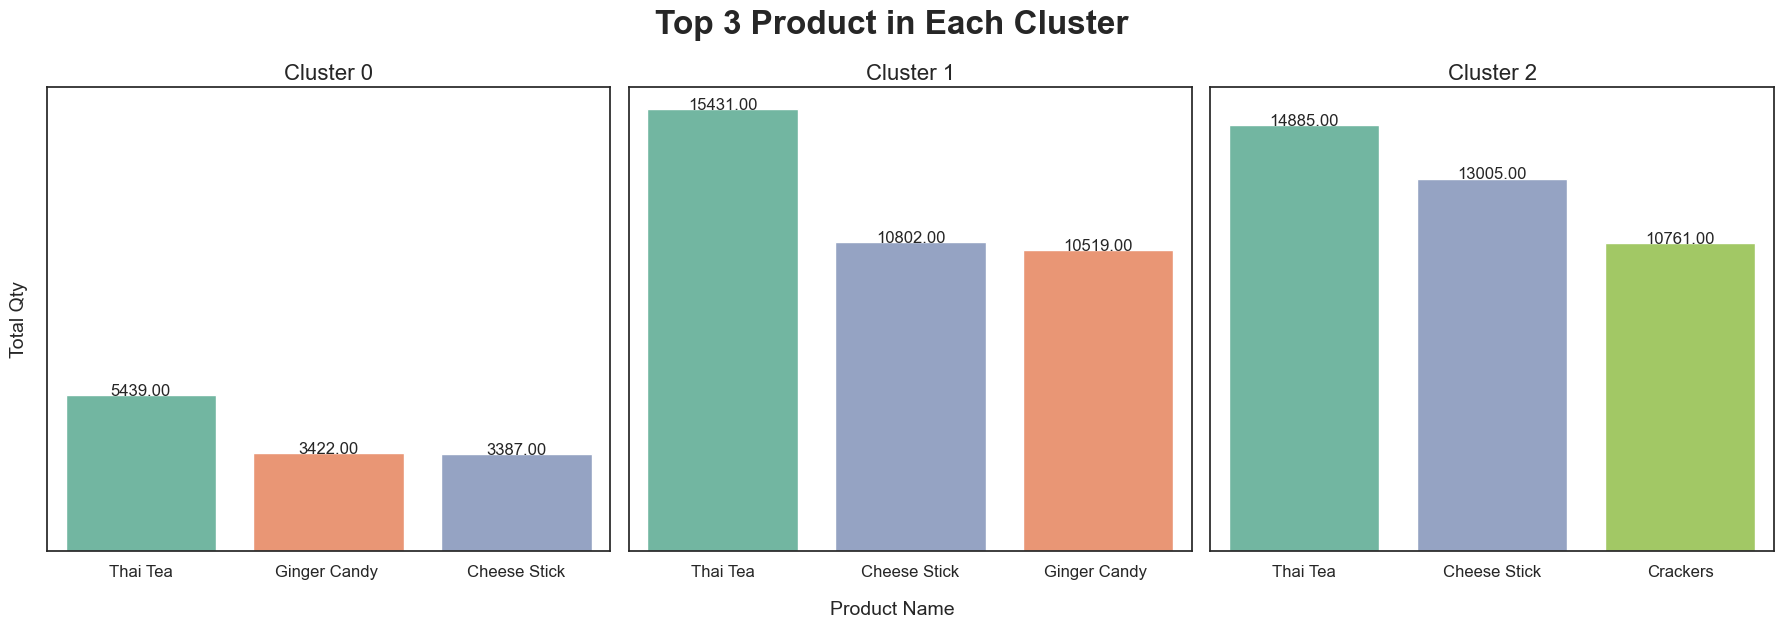

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a consistent color palette
palette = sns.color_palette("Set2", n_colors=avg_qty_per_product_0_sorted['Product Name'].nunique())
color_mapping = dict(zip(avg_qty_per_product_0_sorted['Product Name'].unique(), palette))

# Create a single figure and three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)

# Function to set font size for x-tick and y-tick labels
def set_tick_fontsize(ax, fontsize):
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=fontsize)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=fontsize)

def annotate_bars(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 2,
                '{:1.2f}'.format(height),
                ha="center", fontsize=12) 

# Plot for klaster 0
sns.barplot(data=avg_qty_per_product_0_sorted.head(3), x='Product Name', y='TotalQty', ax=axes[0], palette=color_mapping)
annotate_bars(axes[0])
axes[0].set_title('Cluster 0', fontsize=16)
axes[0].set_ylabel('Total Qty', fontsize=14)
axes[0].set_xlabel('')  # Removing the individual x-label
set_tick_fontsize(axes[0], 12)  # Setting font size

# Plot for klaster 1
sns.barplot(data=avg_qty_per_product_1_sorted.head(3), x='Product Name', y='TotalQty', ax=axes[1], palette=color_mapping)
annotate_bars(axes[1])
axes[1].set_title('Cluster 1', fontsize=16)
axes[1].set_ylabel('')
axes[1].set_xlabel('')  # Removing the individual x-label
set_tick_fontsize(axes[1], 12)  # Setting font size

# Plot for klaster 2
sns.barplot(data=avg_qty_per_product_2_sorted.head(3), x='Product Name', y='TotalQty', ax=axes[2], palette=color_mapping)
annotate_bars(axes[2])
axes[2].set_title('Cluster 2', fontsize=16)
axes[2].set_ylabel('')
axes[2].set_xlabel('')  # Removing the individual x-label
set_tick_fontsize(axes[2], 12)  # Setting font size

# Setting a main title for the entire figure
fig.suptitle('Top 3 Product in Each Cluster', fontsize=24, fontweight='bold')

# Setting the common x-label for the entire figure
fig.text(0.5, -0.02, 'Product Name', ha='center', va='center', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(top=0.85) 
plt.show()

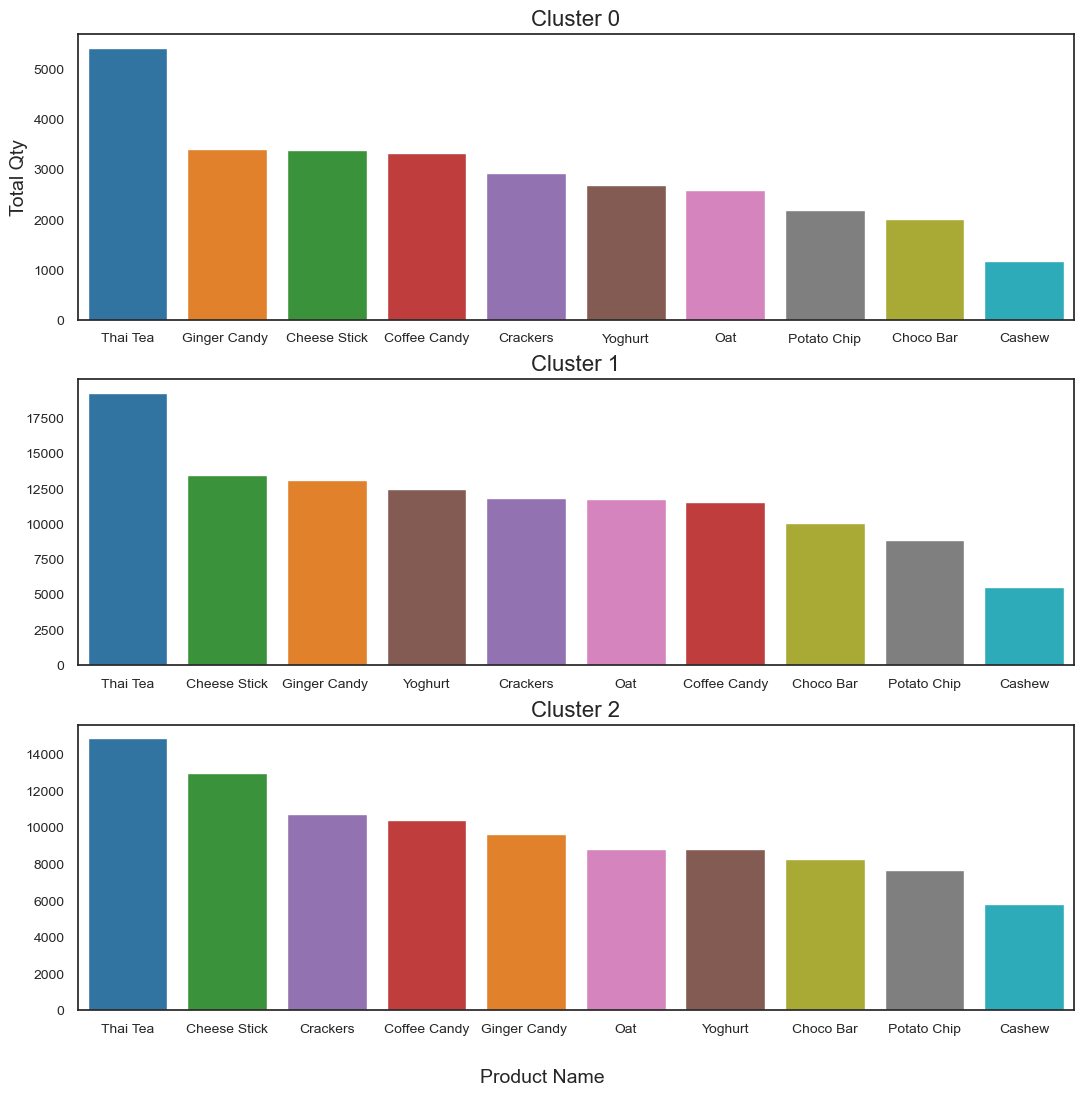

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a consistent color palette
palette = sns.color_palette("tab10", n_colors=avg_qty_per_product_0_sorted['Product Name'].nunique())
color_mapping = dict(zip(avg_qty_per_product_0_sorted['Product Name'].unique(), palette))

# Create a single figure and three subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(11, 12), sharey=False)

# Function to set font size for x-tick and y-tick labels
def set_tick_fontsize(ax, fontsize):
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=fontsize)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=fontsize)

# Plot for klaster 0
sns.barplot(data=avg_qty_per_product_0_sorted.head(10), x='Product Name', y='TotalQty', ax=axes[0], palette=color_mapping)
axes[0].set_title('Cluster 0', fontsize=16)
axes[0].set_ylabel('Total Qty', fontsize=14)
axes[0].set_xlabel('')  # Removing the individual x-label
set_tick_fontsize(axes[0], 10)  # Setting font size

# Plot for klaster 1
sns.barplot(data=avg_qty_per_product_1_sorted.head(10), x='Product Name', y='TotalQty', ax=axes[1], palette=color_mapping)
axes[1].set_title('Cluster 1', fontsize=16)
axes[1].set_ylabel('')
axes[1].set_xlabel('')  # Removing the individual x-label
set_tick_fontsize(axes[1], 10)  # Setting font size

# Plot for klaster 2
sns.barplot(data=avg_qty_per_product_2_sorted.head(10), x='Product Name', y='TotalQty', ax=axes[2], palette=color_mapping)
axes[2].set_title('Cluster 2', fontsize=16)
axes[2].set_ylabel('')
axes[2].set_xlabel('')  # Removing the individual x-label
set_tick_fontsize(axes[2], 10)  # Setting font size

# Setting a main title for the entire figure
#fig.suptitle('Top 3 Product in Each Cluster', fontsize=24, fontweight='bold')

# Setting the common x-label for the entire figure
fig.text(0.5, -0.02, 'Product Name', ha='center', va='center', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(top=0.85) 
plt.show()

In [139]:
avg_qty_per_product_0_sorted

,Product Name,TotalQty
8,Thai Tea,5439
5,Ginger Candy,3422
1,Cheese Stick,3387
3,Coffee Candy,3328
4,Crackers,2932
9,Yoghurt,2687
6,Oat,2592
7,Potato Chip,2184
2,Choco Bar,2012
0,Cashew,1171


## Best Method

Determining the best cluster method using the icd rate criteria, it was found that the icd rate in the fuzzy c-means method is smaller than the k-means so that the best cluster method is fuzzy c-means with the optimum number of clusters of 3.

## CONCLUSION

- **Cluster 2** "loyal" customers who frequently purchase and spend more money on snacks. They might be regular patrons or those buying for business purposes or large families.
- **Cluster 1** customers with a moderate shopping frequency and total expenditure. They might be purchasing for personal consumption or a small family.
- **Cluster 0** customers who seldom shop or perhaps only buy when there's a specific need or promotion. They might be more budget-conscious customers or those who purchase based on necessities.

Based on the given cluster characteristics, we can assign names that represent their respective traits:

1. **Cluster 2**: **Loyal High-Spenders**
2. **Cluster 1**: **Moderate Shoppers**
3. **Cluster 0**: **Casual Buyers**

### Business Recommendations:

1. **Loyal High-Spenders / High Value**:
    - **Special Offers**: As the most loyal and valuable customers, provide them with special deals or exclusive discounts to show our business's appreciation towards them.
    - **Loyalty Programs**: Launch or promote a loyalty program that awards points or rewards for every purchase. These customers have the potential to accrue points rapidly and redeem them.
    - **Feedback**: They are the customers who interact with our products most frequently, making them a good source for obtaining product feedback or reviews.

2. **Moderate Shoppers / Mid Value**:
    - **Bundling Deals**: Offer bundled packages to increase the quantity of purchases. For instance, "Buy 5 products, get 1 free".
    - **Seasonal Promotions**: Since they shop at a moderate frequency, seasonal promotions or special sales can motivate them to buy more.
    - **Newsletter**: Send out newsletters with the latest offers, snack recipes, or other ways to use our products to increase their purchase frequency.

3. **Casual Buyers**:
    - **Flash Sales**: Initiate flash sales or time-limited offers to motivate these customers to capitalize on the deals.
    - **Discount Coupons**: Provide these customers with discount coupons to encourage them to shop more frequently.
    - **Product Recommendations**: Based on their previous purchase history, suggest other products that might appeal to them.

By understanding the characteristics of each segment, businesses can design more targeted and effective marketing strategies, enhancing customer retention and satisfaction.

## ALL IN CODE

In [361]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import skfuzzy as fuzz

def apply_kmeans(data, n_clusters, random_state=None):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=random_state)
    labels = kmeans.fit_predict(data)
    return labels, kmeans.inertia_

def apply_fuzzy_cmeans(data, n_clusters, random_state=None):
    np.random.seed(random_state)
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(data.T, n_clusters, 2, error=0.005, maxiter=1000)
    labels = np.argmax(u, axis=0)
    return labels

def icd_rate(data, labels):
    n_clusters = len(np.unique(labels))
    overall_mean = np.mean(data, axis=0)
    sst = np.sum(np.linalg.norm(data - overall_mean, axis=1) ** 2)
    sse = sum([np.sum(np.linalg.norm(data.iloc[np.where(labels == i)] - np.mean(data.iloc[np.where(labels == i)], axis=0), axis=1) ** 2)
               for i in range(n_clusters)])
    rsq = (sst - sse) / sst
    return 1 - rsq

def pseudo_f_statistic(data, labels):
    n_clusters = len(np.unique(labels))
    overall_mean = np.mean(data, axis=0)
    
    # Between Cluster
    ssb = sum([np.sum(labels == i) * np.linalg.norm(np.mean(data.iloc[np.where(labels == i)], axis=0) - overall_mean) ** 2
               for i in range(n_clusters)])
    
    # Within Cluster
    ssw = sum([np.sum(np.linalg.norm(data.iloc[np.where(labels == i)] - np.mean(data.iloc[np.where(labels == i)], axis=0), axis=1) ** 2)
               for i in range(n_clusters)])
    
    return ssb / ssw

def evaluate_clusters(data, n_clusters, methods=['kmeans', 'fuzzy_cmeans'], random_state=None):
    metrics = {}
    for method in methods:
        if method == 'kmeans':
            labels, inertia = apply_kmeans(data, n_clusters, random_state=random_state)
            metrics[method] = {
                'Inertia': inertia,
                'Silhouette': silhouette_score(data, labels),
                'Calinski-Harabasz': calinski_harabasz_score(data, labels),
                'Davies-Bouldin': davies_bouldin_score(data, labels),
                'ICD Rate': icd_rate(data, labels),
                'Pseudo F-Statistic': pseudo_f_statistic(data, labels)
            }
        elif method == 'fuzzy_cmeans':
            labels = apply_fuzzy_cmeans(data, n_clusters, random_state=random_state)
            metrics[method] = {
                'Silhouette': silhouette_score(data, labels),
                'Calinski-Harabasz': calinski_harabasz_score(data, labels),
                'Davies-Bouldin': davies_bouldin_score(data, labels),
                'ICD Rate': icd_rate(data, labels),
                'Pseudo F-Statistic': pseudo_f_statistic(data, labels)
            }
            
    return metrics

In [362]:
# Example usage:
results = {}
for n_clusters in range(2, 11):
    results[n_clusters] = evaluate_clusters(cluster_df_prep, n_clusters, random_state=1234)

# To print the results:
for n_clusters, metrics in results.items():
    print(f"For n_clusters = {n_clusters}:")
    for method, values in metrics.items():
        print(f"  {method}:")
        for metric, score in values.items():
            print(f"    {metric}: {score}")

For n_clusters = 2:
  kmeans:
    Inertia: 651.9555007413337
    Silhouette: 0.46884174603777806
    Calinski-Harabasz: 636.5888440526442
    Davies-Bouldin: 0.7558123695715356
    ICD Rate: 0.4114317584236664
    Pseudo F-Statistic: 1.4305367282081891
  fuzzy_cmeans:
    Silhouette: 0.46226964811753274
    Calinski-Harabasz: 633.3179907921775
    Davies-Bouldin: 0.7670201183848716
    ICD Rate: 0.4126797510566289
    Pseudo F-Statistic: 1.423186496162196
For n_clusters = 3:
  kmeans:
    Inertia: 316.9717123222516
    Silhouette: 0.513646877290105
    Calinski-Harabasz: 887.8201626200473
    Davies-Bouldin: 0.6691484152635611
    ICD Rate: 0.20003240838218816
    Pseudo F-Statistic: 3.9991899217119276
  fuzzy_cmeans:
    Silhouette: 0.513646877290105
    Calinski-Harabasz: 887.8201626200474
    Davies-Bouldin: 0.6691484152635611
    ICD Rate: 0.20003240838218816
    Pseudo F-Statistic: 3.999189921711927
For n_clusters = 4:
  kmeans:
    Inertia: 264.0920199045705
    Silhouette: 0.476

In [363]:
import pandas as pd

# Creating a list of dictionaries for DataFrame
df_data = []

for n_clusters, metrics in results.items():
    for method, values in metrics.items():
        for metric, score in values.items():
            df_data.append({
                'Number of Clusters': n_clusters,
                'Method': method,
                'Metric': metric,
                'Score': score
            })

df_results = pd.DataFrame(df_data)
desired_metrics = ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin', 'ICD Rate','Pseudo F-Statistic']
filtered_results = df_results[df_results['Metric'].isin(desired_metrics)]
filtered_results

,Number of Clusters,Method,Metric,Score
1,2,kmeans,Silhouette,0.468842
2,2,kmeans,Calinski-Harabasz,636.588844
3,2,kmeans,Davies-Bouldin,0.755812
4,2,kmeans,ICD Rate,0.411432
5,2,kmeans,Pseudo F-Statistic,1.430537
...,...,...,...,...
94,10,fuzzy_cmeans,Silhouette,0.269228
95,10,fuzzy_cmeans,Calinski-Harabasz,547.164612
96,10,fuzzy_cmeans,Davies-Bouldin,1.234740
97,10,fuzzy_cmeans,ICD Rate,0.081507


In [366]:
def optimal_clusters(df_results):
    # Extracting results for each metric
    pseudo_f_stats = df_results[df_results['Metric'] == 'Pseudo F-Statistic']
    ch_index = df_results[df_results['Metric'] == 'Calinski-Harabasz']
    davies_bouldin = df_results[df_results['Metric'] == 'Davies-Bouldin']
    silhouette = df_results[df_results['Metric'] == 'Silhouette']

    # Finding the number of clusters for the maximum/minimum values
    opt_ch_index = ch_index[ch_index['Score'] == ch_index['Score'].max()]['Number of Clusters'].values[0]
    opt_davies = davies_bouldin[davies_bouldin['Score'] == davies_bouldin['Score'].min()]['Number of Clusters'].values[0]
    opt_silhouette = silhouette[silhouette['Score'] == silhouette['Score'].max()]['Number of Clusters'].values[0]
    opt_pseudo_f = pseudo_f_stats[pseudo_f_stats['Score'] == pseudo_f_stats['Score'].max()]['Number of Clusters'].values[0]

    return {
        'Optimal Clusters for Calinski-Harabasz': opt_ch_index,
        'Optimal Clusters for Davies-Bouldin': opt_davies,
        'Optimal Clusters for Silhouette': opt_silhouette,
        #'Optimal Clusters for Pseudo-F': opt_pseudo_f
    }

In [367]:
# Filter results for KMeans and Fuzzy C-means
kmeans_results = df_results[df_results['Method'] == 'kmeans']
fuzzy_cmeans_results = df_results[df_results['Method'] == 'fuzzy_cmeans']

# Determine optimal clusters
opt_clusters_kmeans = optimal_clusters(kmeans_results)
opt_clusters_fuzzy = optimal_clusters(fuzzy_cmeans_results)

# Display results
print("OPTIMAL CLUSTER FOR K-MEANS")
for metric, opt_cluster in opt_clusters_kmeans.items():
    print(f"{metric}: {opt_cluster}")

print("\nOPTIMAL CLUSTER FOR FUZZY C-MEANS")
for metric, opt_cluster in opt_clusters_fuzzy.items():
    print(f"{metric}: {opt_cluster}")

OPTIMAL CLUSTER FOR K-MEANS
Optimal Clusters for Calinski-Harabasz: 3
Optimal Clusters for Davies-Bouldin: 3
Optimal Clusters for Silhouette: 3

OPTIMAL CLUSTER FOR FUZZY C-MEANS
Optimal Clusters for Calinski-Harabasz: 3
Optimal Clusters for Davies-Bouldin: 3
Optimal Clusters for Silhouette: 3
